# Lovely Tensors

> After all, you are only human.

## Install

```sh
pip install lovely-tensors
```

## How to use

In [ ]:
# |hide
import torch
from PIL import Image

In [ ]:
# |hide
torch.set_printoptions(linewidth=120)

In [ ]:
# |hide
# Don't depend on torchvision
# numbers = VF.normalize(VF.center_crop(VF.to_tensor(Image.open("tenchman.jpg")), 196), **in_stats)
numbers = torch.load("mysteryman.pt")

How often do you find yourself debugging PyTorch code? You dump a tensor to the cell output, and see this:

In [ ]:
numbers

tensor[3, 196, 196] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073

Was it really useful?

What is the shape?\
What are the statistics?\
Are any of the values `nan` or `inf`?\
Is it an image of a man holding a tench?

In [ ]:
import lovely_tensors as lt

In [ ]:
lt.monkey_patch()

## `__repr__()`

In [ ]:
# A very short tensor - no min/max
numbers.flatten()[:2]

tensor[2] μ=-0.345 σ=0.012 [-0.354, -0.337]

In [ ]:
# A slightly longer one
numbers.flatten()[:6].view(2,3)

tensor[2, 3] n=6 x∈[-0.440, -0.337] μ=-0.388 σ=0.038 [[-0.354, -0.337, -0.405], [-0.440, -0.388, -0.405]]

In [ ]:
# Too long to show the values
numbers

tensor[3, 196, 196] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073

In [ ]:
spicy = numbers.flatten()[:12].clone()

spicy[0] *= 10000
spicy[1] /= 10000
spicy[2] = float('inf')
spicy[3] = float('-inf')
spicy[4] = float('nan')

spicy = spicy.reshape((2,6))
spicy

tensor[2, 6] n=12 x∈[-3.541e+03, -3.369e-05] μ=-393.776 σ=1.180e+03 +inf! -inf! nan!

In [ ]:
# A zero tensor
torch.zeros(10, 10)

tensor[10, 10] n=100 all_zeros

In [ ]:
spicy.verbose

tensor[2, 6] n=12 x∈[-3.541e+03, -3.369e-05] μ=-393.776 σ=1.180e+03 +inf! -inf! nan!
[[-3.5405e+03, -3.3693e-05,         inf,        -inf,         nan, -4.0543e-01],
 [-4.2255e-01, -4.9105e-01, -5.0818e-01, -5.5955e-01, -5.4243e-01, -5.0818e-01]]

In [ ]:
spicy.plain

[[-3.5405e+03, -3.3693e-05,         inf,        -inf,         nan, -4.0543e-01],
 [-4.2255e-01, -4.9105e-01, -5.0818e-01, -5.5955e-01, -5.4243e-01, -5.0818e-01]]

## Going `.deeper`

In [ ]:
numbers.deeper

tensor[3, 196, 196] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073
  tensor[196, 196] n=38416 x∈[-2.118, 2.249] μ=-0.324 σ=1.036
  tensor[196, 196] n=38416 x∈[-1.966, 2.429] μ=-0.274 σ=0.973
  tensor[196, 196] n=38416 x∈[-1.804, 2.640] μ=-0.567 σ=1.178

In [ ]:
# You can go deeper if you need to
dt = numbers[0,:45,0].view(3,3,5)
dt.deeper(2)

tensor[3, 3, 5] n=45 x∈[-0.988, -0.337] μ=-0.538 σ=0.152
  tensor[3, 5] n=15 x∈[-0.611, -0.354] μ=-0.526 σ=0.086
    tensor[5] x∈[-0.474, -0.354] μ=-0.419 σ=0.044 [-0.354, -0.405, -0.474, -0.440, -0.423]
    tensor[5] x∈[-0.611, -0.542] μ=-0.590 σ=0.028 [-0.611, -0.611, -0.594, -0.594, -0.542]
    tensor[5] x∈[-0.611, -0.542] μ=-0.570 σ=0.038 [-0.542, -0.542, -0.542, -0.611, -0.611]
  tensor[3, 5] n=15 x∈[-0.988, -0.337] μ=-0.597 σ=0.233
    tensor[5] x∈[-0.988, -0.560] μ=-0.748 σ=0.199 [-0.560, -0.560, -0.714, -0.919, -0.988]
    tensor[5] x∈[-0.971, -0.405] μ=-0.662 σ=0.235 [-0.971, -0.816, -0.645, -0.474, -0.405]
    tensor[5] x∈[-0.474, -0.337] μ=-0.381 σ=0.056 [-0.388, -0.371, -0.337, -0.337, -0.474]
  tensor[3, 5] n=15 x∈[-0.679, -0.423] μ=-0.490 σ=0.069
    tensor[5] x∈[-0.491, -0.423] μ=-0.457 σ=0.027 [-0.457, -0.423, -0.440, -0.474, -0.491]
    tensor[5] x∈[-0.491, -0.440] μ=-0.464 σ=0.020 [-0.491, -0.457, -0.440, -0.457, -0.474]
    tensor[5] x∈[-0.679, -0.457] μ=-0.549 σ=0.0

## Now in `.rgb` colour

The important queston - is it our man?

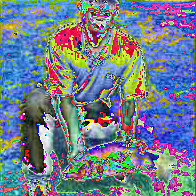

In [ ]:
numbers.rgb

_Maaaaybe?_ Looks like someone normalized him.

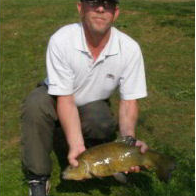

In [ ]:
in_stats = ( (0.485, 0.456, 0.406),     # mean 
             (0.229, 0.224, 0.225) )    # std
numbers.rgb(in_stats)

It's indeed our hero, the Tenchman!

## `.plt` the statistics

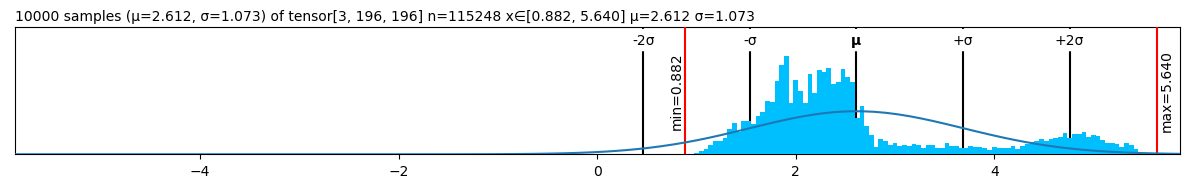

In [ ]:
(numbers+3).plt

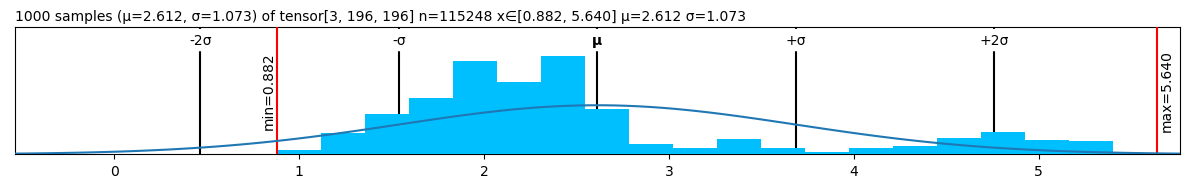

In [ ]:
(numbers+3).plt(center="mean", max_s=1000)

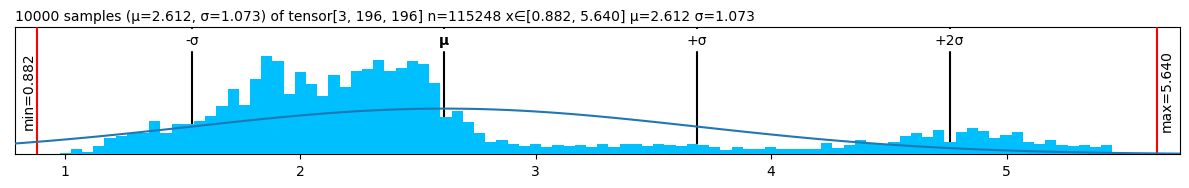

In [ ]:
(numbers+3).plt(center="range")

## Without `.monkey_patch`

In [ ]:
lt.lovely(spicy)

tensor[2, 6] n=12 x∈[-3.541e+03, -3.369e-05] μ=-393.776 σ=1.180e+03 +inf! -inf! nan!

In [ ]:
lt.lovely(spicy, verbose=True)

tensor[2, 6] n=12 x∈[-3.541e+03, -3.369e-05] μ=-393.776 σ=1.180e+03 +inf! -inf! nan!
[[-3.5405e+03, -3.3693e-05,         inf,        -inf,         nan, -4.0543e-01],
 [-4.2255e-01, -4.9105e-01, -5.0818e-01, -5.5955e-01, -5.4243e-01, -5.0818e-01]]

In [ ]:
lt.lovely(numbers, depth=1)

tensor[3, 196, 196] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073
  tensor[196, 196] n=38416 x∈[-2.118, 2.249] μ=-0.324 σ=1.036
  tensor[196, 196] n=38416 x∈[-1.966, 2.429] μ=-0.274 σ=0.973
  tensor[196, 196] n=38416 x∈[-1.804, 2.640] μ=-0.567 σ=1.178

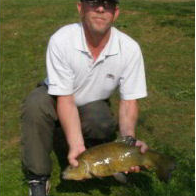

In [ ]:
lt.rgb(numbers, in_stats)

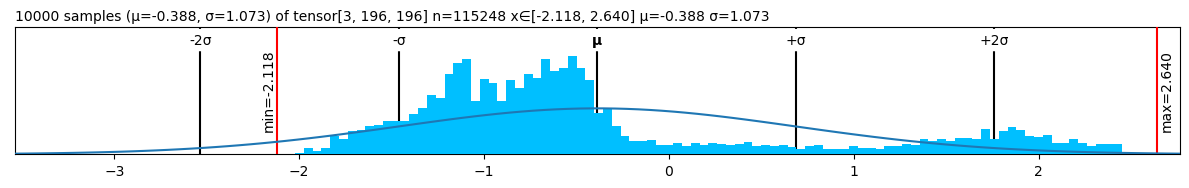

In [ ]:
lt.plot(numbers, center="mean")